<a href="https://colab.research.google.com/github/alievrusik/cv-course-hse-summer-2020/blob/master/lecture_1/colorspaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV

Установка
* Windows - https://docs.opencv.org/trunk/d7/d9f/tutorial_linux_install.html
* Linux - https://docs.opencv.org/trunk/d7/d9f/tutorial_linux_install.html
* Mac OS - https://www.learnopencv.com/install-opencv3-on-macos/ 
* Colab - Chilling out 

# Цветовые пространства

## Загрузка изображения из файла

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
from skimage import data

In [3]:
#in colab
#img = data.astronaut()

In [4]:
img = cv2.imread('./lena.png', cv2.IMREAD_COLOR)

In [5]:
print('type: ', type(img))
print('shape: ', img.shape)

type:  <class 'numpy.ndarray'>
shape:  (512, 512, 3)


## Визуализация в matplotlib

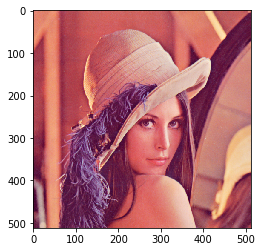

In [6]:
plt.imshow(img[:, :, ::-1])

## Переходим в чернобелое изображение

In [7]:
plt.rcParams['image.cmap'] = 'gray'

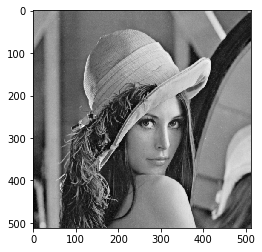

In [8]:
#simple grayscale image
plt.imshow(np.mean(img, axis=2))

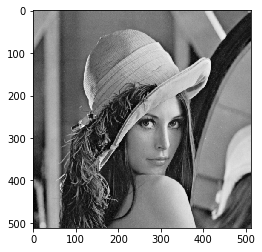

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

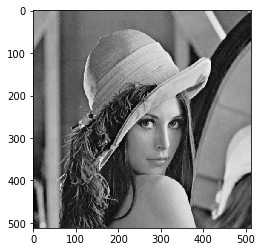

In [10]:
#переведите в чб, с правильными коэффициентами (.3*R+.59*G+.11B)

plt.imshow(0.11*img[:, :, 0] + 0.59*img[:, :, 1] + 0.3*img[:, :, 2])

## Переходим в пространство цветов HSV

In [11]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

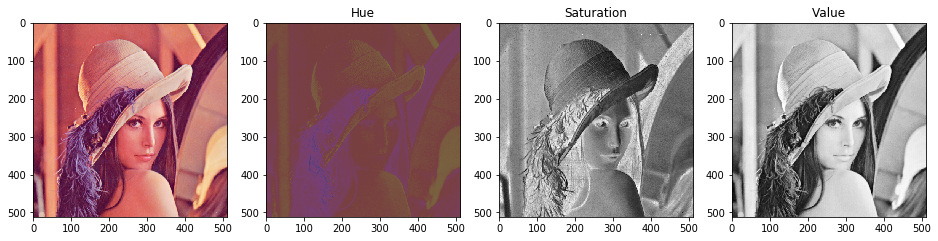

In [12]:
plt.figure(1, figsize = (16, 4))
plt.subplot(141)
plt.imshow(img[...,::-1])
plt.subplot(142)

img_hue = img_hsv.copy()
img_hue[:,:,1] = 120
img_hue[:,:,2] = 120

plt.imshow(cv2.cvtColor(img_hue, cv2.COLOR_HSV2RGB), cmap='gray')
plt.title('Hue')
plt.subplot(143)
plt.imshow(img_hsv[:,:,1])
plt.title('Saturation')
plt.subplot(144)
plt.imshow(img_hsv[:,:,2])
plt.title('Value');

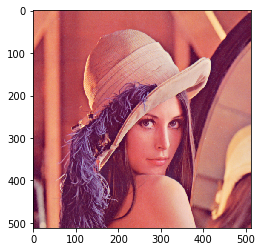

In [13]:
#Задание: напишите код переводящий HSV-изображение обратно в RGB, и выведите полученное изображение

plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

##  Преобразователь HSV <-> RGB с нуля

RGB -> HSV

![rgb2hsv](http://2.bp.blogspot.com/-rluT6STLCdo/T939RuAHF2I/AAAAAAAAAPo/3pPFGguifBg/s1600/rgbtohsv.png)

HSV -> RGB

![hsv2rgb](http://4.bp.blogspot.com/-BIcNZkeJHn0/T94CP7e0F3I/AAAAAAAAAP8/ZX7vnhdklV8/s1600/hsvtorgb.png)

In [14]:
def rgb_to_hsv(r, g, b):
    """
    args:
        r, g, b: floating numbers in range [0, 1]
    returns:
        h, s, v: floating numbers in range [0, 1]
    """
    maxc = max(r, g, b)
    minc = min(r, g, b)
    v = maxc
    if minc == maxc:
        return 0.0, 0.0, v
    s = (maxc-minc) / maxc
    rc = (maxc-r) / (maxc-minc)
    gc = (maxc-g) / (maxc-minc)
    bc = (maxc-b) / (maxc-minc)
    if r == maxc:
        h = bc-gc
    elif g == maxc:
        h = 2.0+rc-bc
    else:
        h = 4.0+gc-rc
    h = (h/6.0) % 1.0
    return h, s, v

In [15]:
def hsv_to_rgb(h, s, v):
    """
    args:
        h, s, v: floating numbers in range [0, 1]
    returns:
        r, g, b: floating numbers in range [0, 1]
    """
    if s == 0.0:
        return v, v, v
    i = int(h*6.0) # XXX assume int() truncates!
    f = (h*6.0) - i
    p = v*(1.0 - s)
    q = v*(1.0 - s*f)
    t = v*(1.0 - s*(1.0-f))
    i = i%6
    if i == 0:
        return v, t, p
    if i == 1:
        return q, v, p
    if i == 2:
        return p, v, t
    if i == 3:
        return p, q, v
    if i == 4:
        return t, p, v
    if i == 5:
        return v, p, q

Используя функцию rgb_to_hsv преобразуйте изображение 'img' в hsv

In [20]:
#делим на 255, чтобы отобразить значения в отрезок [0,1]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255


#векторизованная функция может принимать на вход массивы вместо скаляров
vectorized_rgb2hsv = np.vectorize(rgb_to_hsv)

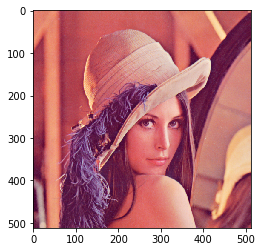

In [21]:
#векторизованная функция возвращает tuple длины 3
hsv_tuple = vectorized_rgb2hsv(img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2])

my_img_hsv = np.stack(hsv_tuple, axis=2)

#для проверки смотрим правильно ли все сейчас работает. Для этого:
#1. Умножаем на [180,255,255] (по стандарту opencv - HUE может принимать значения от 0 до 180, SATURATION и VALUE - от 0 до 255)
#2. Преобразуем в целочисленные значения
#3. Преобразуем из HSV в RGB

plt.imshow(cv2.cvtColor((my_img_hsv*np.array([180,255,255])).astype('uint8'), cv2.COLOR_HSV2RGB))

Используя функцию hsv_to_rgb преобразуйте HSV изображение обратно в RGB.

In [22]:
#снова векторизируем функцию
vectorized_hsv2rgb = np.vectorize(hsv_to_rgb)

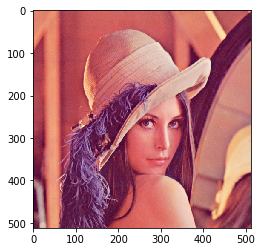

In [23]:
rgb_tuple = vectorized_hsv2rgb(my_img_hsv[:,:,0], my_img_hsv[:,:,1], my_img_hsv[:,:,2])
my_img_rgb = np.stack(rgb_tuple, axis=2)
plt.imshow(my_img_rgb)

*Совет*: всегда используйте numpy операции вместо циклов. Практически для любой операции, которую вы хотите реализовать циклом, есть соответствующий аналог в Numpy.